# Poisson editing
Adapted by Nicolas Papadakis (IMB) and Charles Dossal (INSA Toulouse) from works by William Emmanuel and Pierre Bénard (LaBRI)

## Introduction
The goal of this assignment is to apply the Poisson editing algorithm [1] for image blending.

In the following, $T$ is a target image,  $S$ a source image,  and a binary mask representing an area $\Omega$ of $S$ to copy in $T$. All images are defined on the same domain $D$ of sizee $M\times N$.

The idea of [1] is to copy the spatial gradients $\nabla S$ of the source image inside $T$, and not the color values $S$. As illustrated below, this gives more realistic blendings.


<table align="center"><tr><td><img src="./img/target_Boat.png" style="width: 200px;"></td><td><img src="./img/source_Kraken.png" style="width: 200px;"></td><td><img src="./img/mask_Kraken.png" style="width: 200px;"></td><td><img src="./img/naive.png" style="width: 200px;"></td><td><img src="./img/poisson_blending.png" style="width: 200px;"></td></tr>
<tr><td>Target $T$</td><td>Source $S$</td><td>Mask</td><td>Naive copy/paste of $S$</td><td>Poisson blending [1]: copy of $\nabla S$</td></tr>
</table>





To realize such blending, we find an image $u$ solution of:

$$\min_u \int_\Omega ||\nabla u-\nabla S||^2,$$
under the constraint $u_{D\backslash \Omega}=T$.

This problem can be stated as follow
\begin{equation*}
\min_u \int_\Omega ||\nabla u-\nabla S||^2+\iota_{K}(u)
\end{equation*}
where $K$ is the set of images which coincide with the target out of the mask.
We can observe that the set $K$ is a closed convex set... Why ?

In this setting we can use the projected gradient which is a particular case of the Forward backward algorithm to solve this problem of fusion of images.

We will study two examples but you can try others on your own.


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
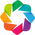

In [1]:
import numpy as np
import scipy as scp
import pylab as pyl
import pywt
import pandas as pd
import holoviews as hv
import param
import panel as pn
import matplotlib.pyplot as plt
from panel.pane import LaTeX
import requests
hv.extension('bokeh')
import warnings
warnings.filterwarnings('ignore')
from PIL import Image
from io import BytesIO


In [2]:
caselist=['Kraken', 'MonaLisa']

Data are available online but you have downloaded them, you can work online changing the value of the variable "local" in the next cell.

In [3]:
local=0
def chargeData(name):
    if local:
        if name=='Kraken':
            target=np.array(Image.open("./img/target_Boat.png")).astype(float)
            source=np.array(Image.open("./img/source_Kraken.png")).astype(float)
            mask2=np.array(Image.open("./img/mask_Kraken.png")).astype(float)/255
        if name=='MonaLisa':
            target=np.array(Image.open("./img/Joconde.jpg")).astype(float)
            source=np.array(Image.open("./img/source_Heisenberg.jpeg")).astype(float)
            mask2=np.array(Image.open("./img/mask_joconde.jpeg")).astype(float)/255
    else:
        if name=='Kraken':
            url='https://plmlab.math.cnrs.fr/dossal/charlesdossalnesterov/raw/master/img/target_Boat.png?inline=false'
            response = requests.get(url)
            target=np.array(Image.open(BytesIO(response.content))).astype(float)
            url='https://plmlab.math.cnrs.fr/dossal/charlesdossalnesterov/raw/master/img/source_Kraken.png?inline=false'
            response = requests.get(url)
            source=np.array(Image.open(BytesIO(response.content))).astype(float)
            url='https://plmlab.math.cnrs.fr/dossal/charlesdossalnesterov/raw/master/img/mask_Kraken.png?inline=false'
            response = requests.get(url)
            mask2=np.array(Image.open(BytesIO(response.content))).astype(float)/255
        if name=='MonaLisa':
            url='https://plmlab.math.cnrs.fr/dossal/charlesdossalnesterov/raw/master/img/Joconde.jpg?inline=false'
            response = requests.get(url)
            target=np.array(Image.open(BytesIO(response.content))).astype(float)
            url='https://plmlab.math.cnrs.fr/dossal/charlesdossalnesterov/raw/master/img/source_Heisenberg.jpeg?inline=false'
            response = requests.get(url)
            source=np.array(Image.open(BytesIO(response.content))).astype(float)
            url='https://plmlab.math.cnrs.fr/dossal/charlesdossalnesterov/raw/master/img/mask_joconde.jpeg?inline=false'
            response = requests.get(url)
            mask2=np.array(Image.open(BytesIO(response.content))).astype(float)/255
    return target,source,mask2

Have a look to the two set of data.

In [4]:
target,source,mask2=chargeData('Kraken')
optionsRGB=dict(width=300,height=300,xaxis=None,yaxis=None,toolbar=None)
optionsGray=dict(cmap='gray',width=300,height=300,xaxis=None,yaxis=None,toolbar=None)
pn.Row(hv.RGB(target.astype('uint8')).opts(**optionsRGB),hv.RGB(source.astype('uint8')).opts(**optionsRGB),hv.Image((mask2*255).astype('uint8')).opts(**optionsGray))

BokehModel(combine_events=True, render_bundle={'docs_json': {'23866329-5d16-4e9c-8e2c-a23e83b7910d': {'version…

In the following we are giving some discrete gradient and associated divergence.

In [5]:
def GradientHor(x):
    y=x-np.roll(x,1,axis=1)
    y[:,0]=0
    return y
def GradientVer(x):
    y=x-np.roll(x,1,axis=0)
    y[0,:]=0
    return y
def DivHor(x):
    N=len(x[0])
    y=x-np.roll(x,-1,axis=1)
    y[:,0]=-x[:,1]
    y[:,N-1]=x[:,N-1]
    return y
def DivVer(x):
    N=len(x)
    y=x-np.roll(x,-1,axis=0)
    y[0,:]=-x[1,:]
    y[N-1,:]=x[N-1,:]
    return y
def Gradient(x):
    y=[]
    y.append(GradientHor(x))
    y.append(GradientVer(x))
    return y
def Div(y):
    x=DivHor(y[0])+DivVer(y[1])
    return x

We defined the two functions Projection and Gradient that will be necessary to compute the projected gradient. We also calculated the Lipschitz constant of the gradient of $\text{fonc1 : }x\mapsto \Vert\nabla x -y\Vert_2^2$

In [6]:
def Proj(im,ma,iref):
    res = np.where(ma==0,iref,im)
    return res

def GradientFonc1(x,y):
    g = Gradient(x)
    r1 = g[0] - y[0]
    r2 = g[1] - y[1]
    res = Div([r1,r2])

    return res

$\begin{equation}
f_1 : x\mapsto \Vert\nabla x -y\Vert_2^2
\end{equation}$

$\begin{equation}
\nabla f_1(x) = \text{div}(\nabla x -y)
\end{equation}$

In the first step we divide the source and the target into the three chanels

In [7]:
target0=target[:,:,0]
source0=source[:,:,0]
target1=target[:,:,1]
source1=source[:,:,1]
target2=target[:,:,2]
source2=source[:,:,2]

We computed then a naive fusion with a simple projection.

In [8]:
res0 = Proj(source0,mask2,target0)
res1 = Proj(source1,mask2,target1)
res2 = Proj(source2,mask2,target2)

res_naive = np.stack((res0,res1,res2),axis=2)
pn.Row(hv.RGB(res_naive.astype('uint8')).opts(**optionsRGB))

# print(GradientFonc(source0,target0))
# print(GradientFonc1(source0,target0))

BokehModel(combine_events=True, render_bundle={'docs_json': {'4e285d87-3caa-4d98-a06b-8b24f3b56543': {'version…

L'incrustation de l'image est affreuse !

We write a function FBPoissonEditing that compute the projected gradient on a grayscale image (single color chanel). Don't forget to clip the image at the end.
The function must return the last iterate of the sequence and a curve of the values of iterates (that can be sampled for example with only at most 100 or 200 values) 

$\underline{\texttt{Algorithme du gradient projeté :}}$

$$
\begin{array}{l}
\textbf{Entrées :} x_0 \in \mathbb{R}^n\\
\textbf{Tant que}\\
\begin{array}{l}
g_k = x - \alpha_k \nabla f_1(x_k) \quad \text{avec} \quad f_1(x) = \Vert\nabla x -v\Vert_2^2\\
x_{k+1} = \Pi_{T}(g_k)
\end{array}\\
\textbf{Fin Tant que}\\
\end{array}
$$

In [9]:
def f_obj(y, v, ma):
    u = (Gradient(y)[0] - v[0])**2 + (Gradient(y)[1] - v[1])**2
    return np.sum(u*ma)

def FBPoissonEditing2(targ,sour,ma,step,Niter, v=None):
    x = sour
    i = 0
    f = np.zeros(Niter//10)

    # seemless cloning de base
    if v is None:
        v = Gradient(sour)

    for i in range(1, Niter+1):
        gk = x - step/8*GradientFonc1(x,v)
        x = Proj(gk,ma,targ)
        if i%10==0:
            u = f_obj(x,v,ma)
            f[i//10 -1] = u
    return np.clip(x,0,255),f

We tested the function with a step smaller than $2$ and 1000 iterations and compare the result with a naive approach. To get the result on a color image, the previous algorithm must be used on each color channel and the 3 output must be gather in a single color image.

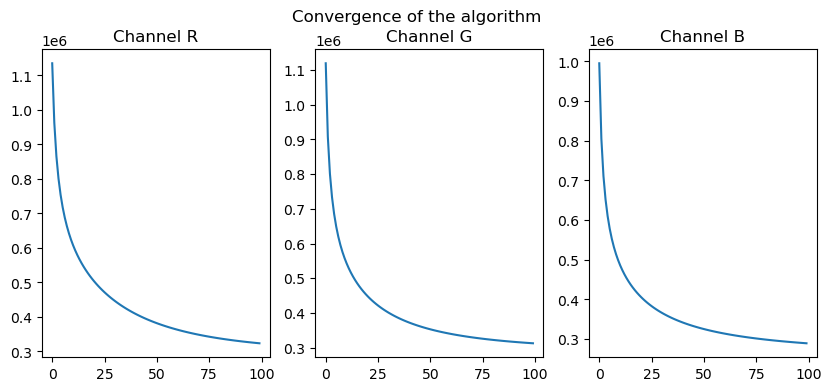

BokehModel(combine_events=True, render_bundle={'docs_json': {'999e5bb1-8d68-4271-90db-11e977d6cabc': {'version…

In [10]:
# res,f=FBPoissonEditing2(target0,source0,mask2,0,100)
# print(res)

step = 1
res0,f0=FBPoissonEditing2(target0,source0,mask2,step,1000)
res1,f1=FBPoissonEditing2(target1,source1,mask2,step,1000)
res2,f2=FBPoissonEditing2(target2,source2,mask2,step,1000)

res = np.stack((res0,res1,res2),axis=2)
# print(res - f[0])
# print(f)

fig, ax = plt.subplots(1, 3, figsize=(10, 4))
ax[0].plot(f0)
ax[0].set_title('Channel R')
ax[1].plot(f1)
ax[1].set_title('Channel G')
ax[2].plot(f2)
ax[2].set_title('Channel B')
plt.suptitle('Convergence of the algorithm')
plt.show()

pn.Row(hv.RGB(res.astype('uint8')).opts(**optionsRGB))

In [11]:
step=1
niter=1000
res0,f0=FBPoissonEditing2(target0,source0,mask2,step,niter)
res1,f1=FBPoissonEditing2(target1,source1,mask2,step,niter)
res2,f2=FBPoissonEditing2(target2,source2,mask2,step,niter)
res=target.copy()
res[:,:,0]=res0
res[:,:,1]=res1
res[:,:,2]=res2
T=len(f0+f1+f2)
t=np.arange(0,T)
pn.Row(hv.RGB(res_naive.astype('uint8')).opts(**optionsRGB),hv.RGB(res.astype('uint8')).opts(**optionsRGB),hv.Curve((t, f0+f1+f2), kdims='iter', vdims='fonc').opts(xaxis=None,toolbar=None))

BokehModel(combine_events=True, render_bundle={'docs_json': {'fbed84ff-7176-499f-b418-0ebf932b8bab': {'version…

Using panel, we created a dashboard to perform the fusion in real time. The output may be four figures with the source, the target, the fusion and the curve of the decay of the function to minimize. 
The step in the gradient descend used in the algorithm will be $self.step/8$. Hence when the variable step will be set to 1, the step in the gradient descent will be exactly equal to the Lipschitz constant of the gradient of $f$.

In [12]:
class FBFusion(param.Parameterized):
    case = param.ObjectSelector(default='Kraken',objects=caselist)
    Niter = param.Integer(100,bounds=(10,3000))
    step = param.Number(1,bounds=(0.1,4))
    def view(self):
        target,source,mask2=chargeData(self.case)
        target0=target[:,:,0]
        source0=source[:,:,0]
        target1=target[:,:,1]
        source1=source[:,:,1]
        target2=target[:,:,2]
        source2=source[:,:,2]

        res0,f0=FBPoissonEditing2(target0,source0,mask2,self.step,self.Niter)
        res1,f1=FBPoissonEditing2(target1,source1,mask2,self.step,self.Niter)
        res2,f2=FBPoissonEditing2(target2,source2,mask2,self.step,self.Niter)

        res = np.stack((res0,res1,res2),axis=2)

        T=len(f0+f1+f2)
        t=np.arange(0,T)

        return pn.Row(hv.RGB(res.astype('uint8')).opts(**optionsRGB), hv.Curve((t, f0+f1+f2), kdims='iter', vdims='fonc').opts(xaxis=None,toolbar=None))

Try the function.

In [13]:
fbfusion= FBFusion()
pn.Row(fbfusion.param,fbfusion.view)

BokehModel(combine_events=True, render_bundle={'docs_json': {'a1a827b6-6820-4e9a-875c-01765731e2df': {'version…

Perform a Fusion using FISTA with a parameter $\alpha$ and create the associated dashboard.



$\underline{\texttt{Méthode accélérée du gradient proximal}}$

$$
\begin{array}{l}
\textbf{Entrées :} x_0 \in \mathbb{R}^n\\
y_0 = x_0\\
\textbf{Tant que}\\
\begin{array}{l}
x_k = \text{prox}_{\alpha_k h} (y_{k-1} - \alpha_k \nabla g(y_{k-1}))\\
y_k = x_k + \frac{k}{k+\alpha} (x_k - x_{k-1})
\end{array}\\
\textbf{Fin Tant que}
\end{array}
$$

De plus, si $f(x) = \begin{cases}
0 \text{ si } x \in X\\
+\infty \text{ sinon}
\end{cases}$  

alors :
$$
\text{prox}_{f}(x_0) = \underset{x \in X}{\text{argmin}} \frac{1}{2} \Vert x - x_0 \Vert_2^2 = \Pi_{X}(x_0)
$$

In [14]:
def FISTAPoissonEditing(targ,sour,ma,step,alpha,Niter, v=None):
    y = sour
    x_pred = sour
    i = 0
    f = np.zeros(Niter//10)

    # seemless cloning de base
    if v is None:
        v = Gradient(sour)

    for i in range(1, Niter+1):
        gk = y - step/8*GradientFonc1(y,v)
        x = Proj(gk,ma,targ)
        y = x + i/(i+alpha)*(x-x_pred)
        if i%10==0:
            u = f_obj(y,v,ma)
            f[i//10 -1 ] = u
        x_pred = x

    return np.clip(x,0,255),f

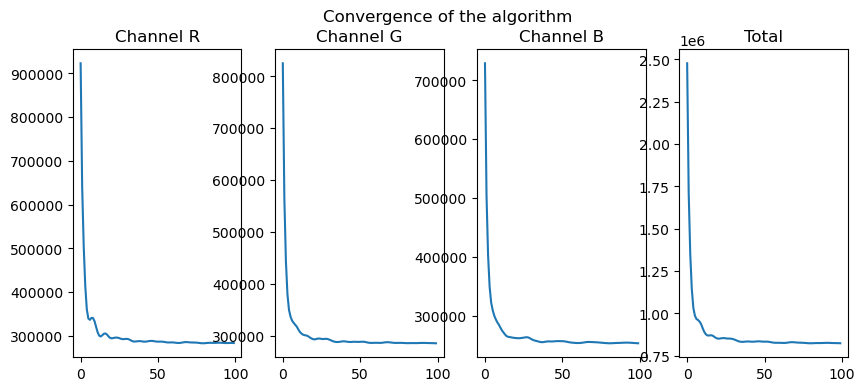

BokehModel(combine_events=True, render_bundle={'docs_json': {'ac1f40a9-552f-45c0-89cc-dc5df6af9d02': {'version…

In [15]:
step = 1
alpha = 1
res0,f0=FISTAPoissonEditing(target0,source0,mask2,step,alpha, 1000)
res1,f1=FISTAPoissonEditing(target1,source1,mask2,step,alpha, 1000)
res2,f2=FISTAPoissonEditing(target2,source2,mask2,step,alpha, 1000)

res = np.stack((res0,res1,res2),axis=2)
# print(res - f[0])
# print(f)

fig, ax = plt.subplots(1, 4, figsize=(10, 4))
ax[0].plot(f0)
ax[0].set_title('Channel R')
ax[1].plot(f1)
ax[1].set_title('Channel G')
ax[2].plot(f2)
ax[2].set_title('Channel B')
ax[3].plot(f0+f1+f2)
ax[3].set_title('Total')
plt.suptitle('Convergence of the algorithm')
plt.show()

pn.Row(hv.RGB(res.astype('uint8')).opts(**optionsRGB))

In [16]:
class FISTAFusion(param.Parameterized):
    case = param.ObjectSelector(default='Kraken',objects=caselist)
    Niter = param.Integer(100,bounds=(10,3000))
    step = param.Number(1,bounds=(0.1,4))
    alpha = param.Number(3,bounds=(2,15))
    def view(self):
        target,source,mask2=chargeData(self.case)
        target0=target[:,:,0]
        source0=source[:,:,0]
        target1=target[:,:,1]
        source1=source[:,:,1]
        target2=target[:,:,2]
        source2=source[:,:,2]

        res0,f0=FISTAPoissonEditing(target0,source0,mask2,self.step,self.alpha,self.Niter)
        res1,f1=FISTAPoissonEditing(target1,source1,mask2,self.step,self.alpha,self.Niter)
        res2,f2=FISTAPoissonEditing(target2,source2,mask2,self.step,self.alpha,self.Niter)

        res = np.stack((res0,res1,res2),axis=2)

        T=len(f0+f1+f2)
        t=np.arange(0,T)

        # ,Courbe.opts(xaxis=None,toolbar=None)
        return pn.Row(hv.RGB(res.astype('uint8')).opts(**optionsRGB), hv.Curve((t, f0+f1+f2), kdims='iter', vdims='fonc').opts(xaxis=None,toolbar=None))

In [17]:
fistafusion=FISTAFusion()
pn.Row(fistafusion.param,fistafusion.view)

BokehModel(combine_events=True, render_bundle={'docs_json': {'3b9c8810-c986-4e96-a2bc-0ed8bdf7d56e': {'version…

Compare in a third dashboard the difference between FB and FISTA.
Are the limit on the step the same ?

In [18]:
class FBvsFISTAFusion(param.Parameterized):
    case = param.ObjectSelector(default='Kraken',objects=caselist)
    Niter = param.Integer(100,bounds=(10,3000))
    step = param.Number(1,bounds=(0.1,4))
    alpha = param.Number(3,bounds=(2,15))
    def view(self):
        target,source,mask2=chargeData(self.case)
        target0=target[:,:,0]
        source0=source[:,:,0]
        target1=target[:,:,1]
        source1=source[:,:,1]
        target2=target[:,:,2]
        source2=source[:,:,2]

        res0,f0=FBPoissonEditing2(target0,source0,mask2,self.step,self.Niter)
        res1,f1=FBPoissonEditing2(target1,source1,mask2,self.step,self.Niter)
        res2,f2=FBPoissonEditing2(target2,source2,mask2,self.step,self.Niter)

        res = np.stack((res0,res1,res2),axis=2)

        res0b,f0b=FISTAPoissonEditing(target0,source0,mask2,self.step,self.alpha,self.Niter)
        res1b,f1b=FISTAPoissonEditing(target1,source1,mask2,self.step,self.alpha,self.Niter)
        res2b,f2b=FISTAPoissonEditing(target2,source2,mask2,self.step,self.alpha,self.Niter)

        resb = np.stack((res0b,res1b,res2b),axis=2)
        T=len(f0+f1+f2)
        t=np.arange(0,T)

        # , hv.Curve((t, f0+f1+f2), kdims='iter', vdims='fonc').opts(xaxis=None,toolbar=None)

        return pn.Column(pn.Row(hv.RGB(res.astype('uint8')).opts(**optionsRGB)\
            ),hv.RGB(resb.astype('uint8')).opts(**optionsRGB))

In [19]:
fbvsfista=FBvsFISTAFusion()
pn.Row(fbvsfista.param,fbvsfista.view)

BokehModel(combine_events=True, render_bundle={'docs_json': {'54423df4-b285-438e-92e5-50e6a88ab68c': {'version…

## Fusion objet avec trous

### Importation des images et création du masque

On décide de changer les images à fusioner en prenant un image source comportant des trous. On va étudier l'impact de ces trous sur la fusion.

In [20]:
target=np.array(Image.open("./img/eau.png")).astype(float)
source=np.array(Image.open("./img/jo.jpeg")).astype(float)
mask2=np.array(Image.open("./img/jo_ma.png")).astype(float)
mask2=np.where(mask2>0,1,0)
target = target[:,:1400,:]
print(target.shape)
print(source.shape)
print(mask2.shape)


(800, 1400, 3)
(800, 1400, 3)
(800, 1400)


In [21]:
optionsRGB=dict(width=500,height=300,xaxis=None,yaxis=None,toolbar=None)
optionsGray=dict(cmap='gray',width=500,height=300,xaxis=None,yaxis=None,toolbar=None)
pn.Row(hv.RGB(target.astype('uint8')).opts(**optionsRGB),hv.RGB(source.astype('uint8')).opts(**optionsRGB), hv.Image((mask2*255).astype('uint8')).opts(**optionsGray))

BokehModel(combine_events=True, render_bundle={'docs_json': {'8fc8b4e6-ec2b-4276-85cb-5ae8b73b2c86': {'version…

In [22]:
target0=target[:,:,0]
source0=source[:,:,0]
target1=target[:,:,1]
source1=source[:,:,1]
target2=target[:,:,2]
source2=source[:,:,2]

### With seamless cloning

On applique l'algorithme FISTA précédent à nos images.

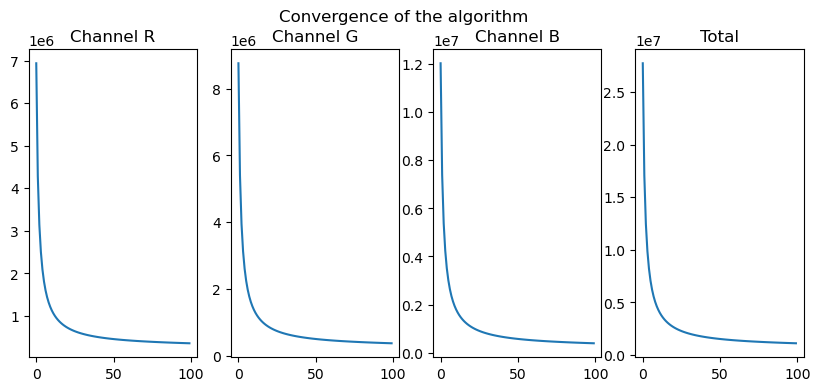

BokehModel(combine_events=True, render_bundle={'docs_json': {'4757e677-1613-49a3-831f-4386e34bf860': {'version…

In [23]:
step = 1
alpha = 3
res0,f0=FISTAPoissonEditing(target0,source0,mask2,step,alpha, 1000)
res1,f1=FISTAPoissonEditing(target1,source1,mask2,step,alpha, 1000)
res2,f2=FISTAPoissonEditing(target2,source2,mask2,step,alpha, 1000)

res = np.stack((res0,res1,res2),axis=2)
# print(res - f[0])
# print(f)

fig, ax = plt.subplots(1, 4, figsize=(10, 4))
ax[0].plot(f0)
ax[0].set_title('Channel R')
ax[1].plot(f1)
ax[1].set_title('Channel G')
ax[2].plot(f2)
ax[2].set_title('Channel B')
ax[3].plot(f0+f1+f2)
ax[3].set_title('Total')
plt.suptitle('Convergence of the algorithm')
plt.show()

pn.Row(hv.RGB(res.astype('uint8')).opts(**optionsRGB))

On remarque une perte de texture en arrière plan avec la méthode de seamless cloning.

### With seamless cloning and destination average

On propose de corriger ce problème en changeant la fonction à minimiser:
\begin{equation*}
\min_u \int_\Omega ||\nabla u-v||^2+\iota_{K}(u)
\end{equation*}

Avec $\mathbf{x} \in \Omega, \mathbf{v}(\mathbf{x})= (\nabla T(\mathbf{x}) + \nabla S(\mathbf{x}))/2$

In [24]:
def grad_trou_affine(source, targ):
    grad_sour = Gradient(source)
    grad_targ = Gradient(targ)
    v0 = (grad_sour[0] + grad_targ[0])/2
    v1 = (grad_sour[1] + grad_targ[1])/2
    return [v0, v1]

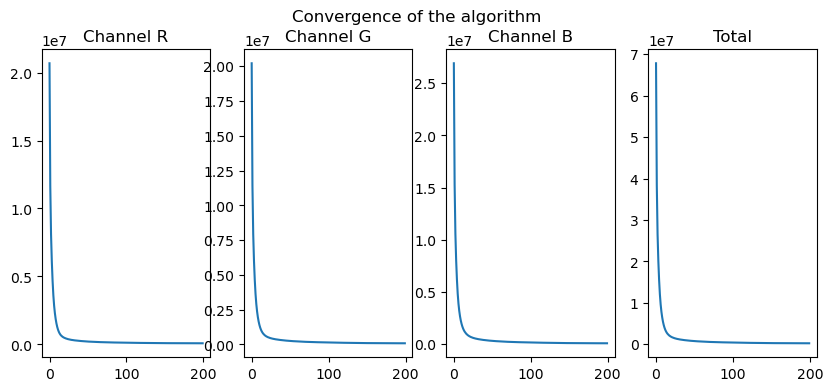

BokehModel(combine_events=True, render_bundle={'docs_json': {'7e31aad7-682d-4134-81ab-b9acc4eedf7a': {'version…

In [25]:
step = 1
alpha = 3
res0,f0=FISTAPoissonEditing(target0,source0,mask2,step,alpha, 2000, grad_trou_affine(source0, target0))
res1,f1=FISTAPoissonEditing(target1,source1,mask2,step,alpha, 2000, grad_trou_affine(source1, target1))
res2,f2=FISTAPoissonEditing(target2,source2,mask2,step,alpha, 2000, grad_trou_affine(source2, target2))

res = np.stack((res0,res1,res2),axis=2)
# print(res - f[0])
# print(f)

fig, ax = plt.subplots(1, 4, figsize=(10, 4))
ax[0].plot(f0)
ax[0].set_title('Channel R')
ax[1].plot(f1)
ax[1].set_title('Channel G')
ax[2].plot(f2)
ax[2].set_title('Channel B')
ax[3].plot(f0+f1+f2)
ax[3].set_title('Total')
plt.suptitle('Convergence of the algorithm')
plt.show()

pn.Row(hv.RGB(res.astype('uint8')).opts(**optionsRGB))

On remarque une amélioration dans la texture en arrière plan. Cependant on a un effet de transparence avec des couleurs atténuées.

### With mixed seamless cloning

On souhaite minimiser la fonction suivante:
\begin{equation*}
\min_u \int_\Omega ||\nabla u-v||^2+\iota_{K}(u)
\end{equation*}

Avec $\mathbf{x} \in \Omega, \mathbf{v}(\mathbf{x})= \begin{cases}\nabla T(\mathbf{x}) & \text { if }\left|\nabla T(\mathbf{x})\right|>|\nabla S(\mathbf{x})|, \\ \nabla S(\mathbf{x}) & \text { sinon. }\end{cases}$

In [26]:
def grad_trou(source, targ):
    grad_sour = Gradient(source)
    grad_targ = Gradient(targ)
    v0 = np.where(np.abs(grad_targ[0])>np.abs(grad_sour[0]), grad_targ[0], grad_sour[0])
    v1 = np.where(np.abs(grad_targ[1])>np.abs(grad_sour[1]), grad_targ[1], grad_sour[1])
    return [v0, v1]

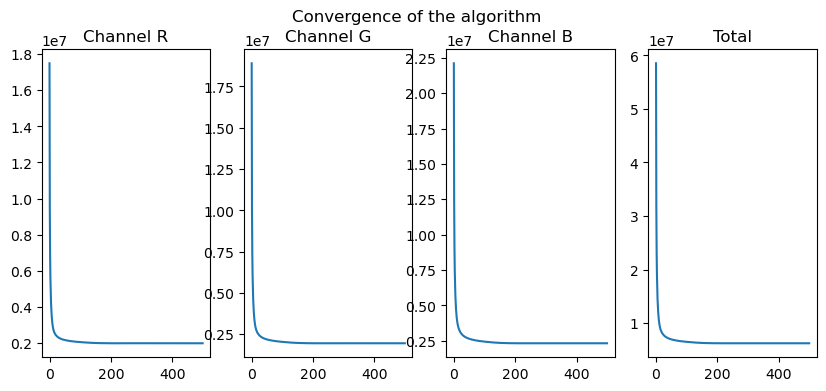

BokehModel(combine_events=True, render_bundle={'docs_json': {'024de00c-5ab7-4ee3-bc1f-121b29534f60': {'version…

In [27]:
step = 1
alpha = 3
res0,f0=FISTAPoissonEditing(target0,source0,mask2,step,alpha, 5000, grad_trou(source0, target0))
res1,f1=FISTAPoissonEditing(target1,source1,mask2,step,alpha, 5000, grad_trou(source1, target1))
res2,f2=FISTAPoissonEditing(target2,source2,mask2,step,alpha, 5000, grad_trou(source2, target2))

res = np.stack((res0,res1,res2),axis=2)
# print(res - f[0])
# print(f)

fig, ax = plt.subplots(1, 4, figsize=(10, 4))
ax[0].plot(f0)
ax[0].set_title('Channel R')
ax[1].plot(f1)
ax[1].set_title('Channel G')
ax[2].plot(f2)
ax[2].set_title('Channel B')
ax[3].plot(f0+f1+f2)
ax[3].set_title('Total')
plt.suptitle('Convergence of the algorithm')
plt.show()

pn.Row(hv.RGB(res.astype('uint8')).opts(**optionsRGB))

Le résultat est satisfaisant. On a une fusion sans perte de texture et sans effet de transparence. Les anneaux sont bien fusionné au fond de l'eau.

## Changement de couleurs

### Importation des images et création du masque

In [28]:
source=np.array(Image.open("./img/schtroumpfs.jpg")).astype(float)
mask4=np.array(Image.open("./img/schtroumpfs_ma.png")).astype(float)
mask4=np.where(mask4[:,:,0]>0,1,0)
print(source.shape)
print(mask4.shape)

(755, 1133, 3)
(755, 1133)


In [29]:
optionsRGB=dict(width=500,height=300,xaxis=None,yaxis=None,toolbar=None)
optionsGray=dict(cmap='gray',width=500,height=300,xaxis=None,yaxis=None,toolbar=None)
pn.Row(hv.RGB(source.astype('uint8')).opts(**optionsRGB), hv.Image((mask4*255).astype('uint8')).opts(**optionsGray))

BokehModel(combine_events=True, render_bundle={'docs_json': {'530b242c-79e8-4b27-bc20-c388ad4e317e': {'version…

### Passer une image en monochrome

L'utilisation du seamless cloning est un bon outil pour changer la couleur d'une image.

Dans un premier temps, on souhaite garder la couleur de la zone selectionnée dans le masque $\Omega$. Ainsi on utilise la méthode de seemless-cloning avec la luminance en target et comme source la zone selctionné $\Omega$.

In [30]:
source0=source[:,:,0]
source1=source[:,:,1]
source2=source[:,:,2]

#luminance
target = 0.299*source0 + 0.587*source1 + 0.114*source2

res0 = Proj(source0,mask4,target)
res1 = Proj(source1,mask4,target)
res2 = Proj(source2,mask4,target)

res_naive = np.stack((res0,res1,res2),axis=2)

pn.Row(hv.Image((target).astype('uint8')).opts(**optionsGray), hv.RGB(res_naive.astype('uint8')).opts(**optionsRGB))

BokehModel(combine_events=True, render_bundle={'docs_json': {'e9596caa-d29f-43d9-95f9-924df9493663': {'version…

On applique l'algorithme FISTA seamless cloning a notre image.

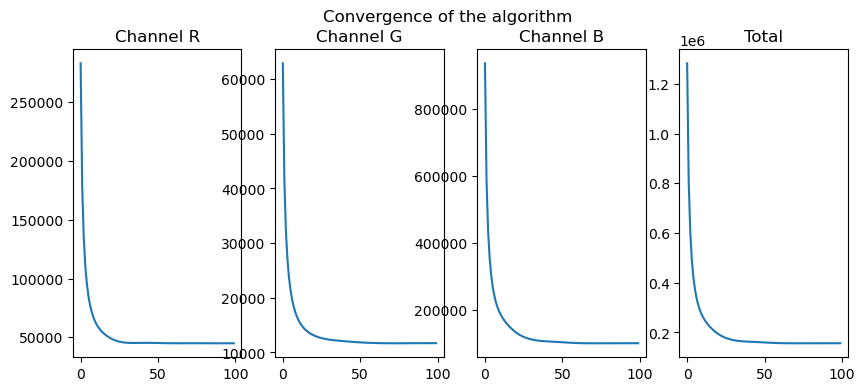

BokehModel(combine_events=True, render_bundle={'docs_json': {'35e72b13-c348-403a-93f3-e41709405765': {'version…

In [31]:
step = 1
alpha = 3
res0,f0=FISTAPoissonEditing(target,source0,mask4,step,alpha, 1000)
res1,f1=FISTAPoissonEditing(target,source1,mask4,step,alpha, 1000)
res2,f2=FISTAPoissonEditing(target,source2,mask4,step,alpha, 1000)

res = np.stack((res0,res1,res2),axis=2)
# print(res - f[0])
# print(f)

fig, ax = plt.subplots(1, 4, figsize=(10, 4))
ax[0].plot(f0)
ax[0].set_title('Channel R')
ax[1].plot(f1)
ax[1].set_title('Channel G')
ax[2].plot(f2)
ax[2].set_title('Channel B')
ax[3].plot(f0+f1+f2)
ax[3].set_title('Total')
plt.suptitle('Convergence of the algorithm')
plt.show()

pn.Row(hv.RGB(res.astype('uint8')).opts(**optionsRGB))

### Recolorisation de l'image

Pour former l'image source on multiplie les canaux RGB de l'image originale par 2, 2 et 0.5 respectivement.

In [32]:
target = source.copy()
target0 = target[:,:,0]
target1 = target[:,:,1]
target2 = target[:,:,2]

source0= 2* source[:,:,0]
source1= 2 *source[:,:,1]
source2= 0.5 * source[:,:,2]

source_modif = np.stack((source0,source1,source2),axis=2)

On applique ensuite l'algorithme FISTA à notre image.

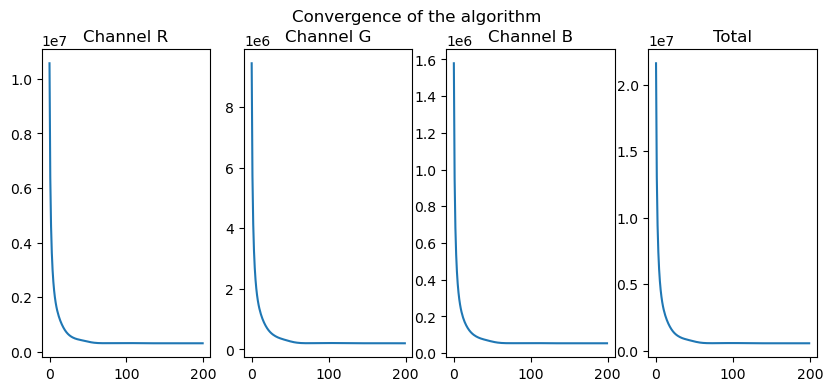

BokehModel(combine_events=True, render_bundle={'docs_json': {'047aeeb6-38a8-4fda-835c-d6a9d91cad04': {'version…

In [33]:
step = 1
alpha = 3
res0,f0=FISTAPoissonEditing(target0,source0,mask4,step,alpha, 2000)
res1,f1=FISTAPoissonEditing(target1,source1,mask4,step,alpha, 2000)
res2,f2=FISTAPoissonEditing(target2,source2,mask4,step,alpha, 2000)

res = np.stack((res0,res1,res2),axis=2)
# print(res - f[0])
# print(f)

fig, ax = plt.subplots(1, 4, figsize=(10, 4))
ax[0].plot(f0)
ax[0].set_title('Channel R')
ax[1].plot(f1)
ax[1].set_title('Channel G')
ax[2].plot(f2)
ax[2].set_title('Channel B')
ax[3].plot(f0+f1+f2)
ax[3].set_title('Total')
plt.suptitle('Convergence of the algorithm')
plt.show()

pn.Row(hv.RGB(res.astype('uint8')).opts(**optionsRGB))

On remarque bien un changement de couleur de l'image.

On peut également modifier choisir l'image sourceen modifiant l'ordre des canaux de l'image target.

In [34]:
target = source.copy()
target0 = target[:,:,0]
target1 = target[:,:,1]
target2 = target[:,:,2]

source2=  source[:,:,0]
source1= source[:,:,1]
source0=  source[:,:,2]

source_modif = np.stack((source0,source1,source2),axis=2)

In [35]:
optionsRGB=dict(width=500,height=300,xaxis=None,yaxis=None,toolbar=None)
optionsGray=dict(cmap='gray',width=500,height=300,xaxis=None,yaxis=None,toolbar=None)
pn.Row(hv.RGB(target.astype('uint8')).opts(**optionsRGB), hv.RGB(source_modif.astype('uint8')).opts(**optionsRGB), hv.Image((mask4*255).astype('uint8')).opts(**optionsGray))

BokehModel(combine_events=True, render_bundle={'docs_json': {'d0882dbe-db77-4d90-ba89-fcfb00def538': {'version…

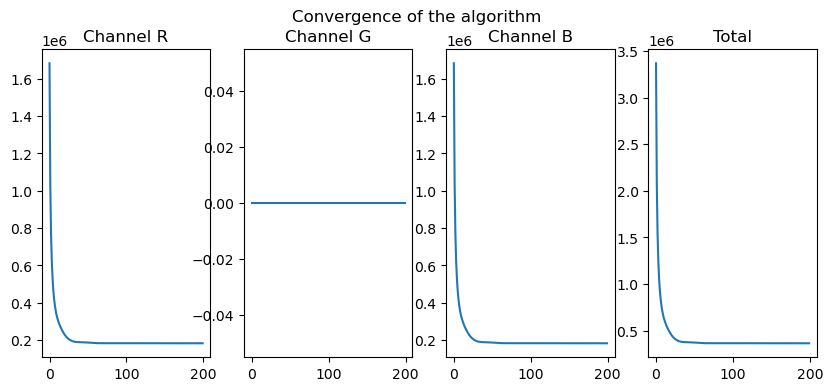

BokehModel(combine_events=True, render_bundle={'docs_json': {'d0c0c3e1-02be-4be7-b8dc-09197fce49e1': {'version…

In [36]:
step = 1
alpha = 3
res0,f0=FISTAPoissonEditing(target0,source0,mask4,step,alpha, 2000)
res1,f1=FISTAPoissonEditing(target1,source1,mask4,step,alpha, 2000)
res2,f2=FISTAPoissonEditing(target2,source2,mask4,step,alpha, 2000)

res = np.stack((res0,res1,res2),axis=2)
# print(res - f[0])
# print(f)

fig, ax = plt.subplots(1, 4, figsize=(10, 4))
ax[0].plot(f0)
ax[0].set_title('Channel R')
ax[1].plot(f1)
ax[1].set_title('Channel G')
ax[2].plot(f2)
ax[2].set_title('Channel B')
ax[3].plot(f0+f1+f2)
ax[3].set_title('Total')
plt.suptitle('Convergence of the algorithm')
plt.show()

pn.Row(hv.RGB(res.astype('uint8')).opts(**optionsRGB))

On a bien remplacer la couleur, même si la couleur n'est pas exactement la même qu'attendu.

# Changement de Contraste

On cherche ici à harmoniser la luminosité de l'image. Cette édition pourrait être utilisée pour augmenter la luminosité d'objet sous-exposé a la lumière ou baisser la luminosité d'endroit sur-exposé comme avec l'exemple ici du reflet sur la pomme.

## importation de l'image et création du masque

In [37]:
source=np.array(Image.open("./img/pomme.jpg")).astype(float)
mask3=np.array(Image.open("./img/pomme_ma.png")).astype(float)
mask3=np.where(mask3>0,1,0)

optionsRGB=dict(width=300,height=300,xaxis=None,yaxis=None,toolbar=None)
optionsGray=dict(cmap='gray',width=300,height=300,xaxis=None,yaxis=None,toolbar=None)
pn.Row(hv.RGB(source.astype('uint8')).opts(**optionsRGB), hv.Image((mask3*255).astype('uint8')).opts(**optionsGray))

BokehModel(combine_events=True, render_bundle={'docs_json': {'b3171517-cf61-484b-a3e7-515e88d44be2': {'version…

In [38]:
source0=source[:,:,0]
source1=source[:,:,1]
source2=source[:,:,2]

## Transformation Fattal et al

Pour regler ce changement de contraste une proposition serait deffectuer une transformation non linéaire sur le champ de guidage v , l'idée serait de moyenner $ \nabla f^* $ et donc le contraste (si le constaste est trop fort on le baisser et inversement).

La transformation de Fattal et al pourrait permettre d'avoir ce resultat , avec cette equation nous obtiendrons comme problème :
\begin{equation*}
\min_f \int_\Omega ||\nabla f^*-v||^2+\iota_{K}(f^)
\end{equation*}

avec $ v=\alpha^\beta \left | {\nabla f^*} \right|^{-\beta} \nabla f^*  $ , $\alpha=0.2$ et $\beta=0.2$

In [39]:
def grad_reflet(source):
    v=[]
    grad_sour = Gradient(source)
    beta=0.2

    res1 = np.where(mask3!=0,grad_sour[1],0)
    sum1 = np.sum(res1)
    denominateur=np.sum(mask3)
    moyenne1=sum1/denominateur

    res0 = np.where(mask3!=0,grad_sour[0],0)
    sum0 = np.sum(res0)
    moyenne0=sum0/denominateur

    alpha=0.2*np.sqrt(moyenne1**2+moyenne0**2)

    v0 = alpha**(beta)*np.linalg.norm((grad_sour[0]))**(-beta)*grad_sour[0]
    v1 = alpha**(beta)*np.linalg.norm((grad_sour[1]))**(-beta)*grad_sour[1]

    v.append(v0)
    v.append(v1)

    return v

On applique l'algorithme FISTA pour minimiser la fonction

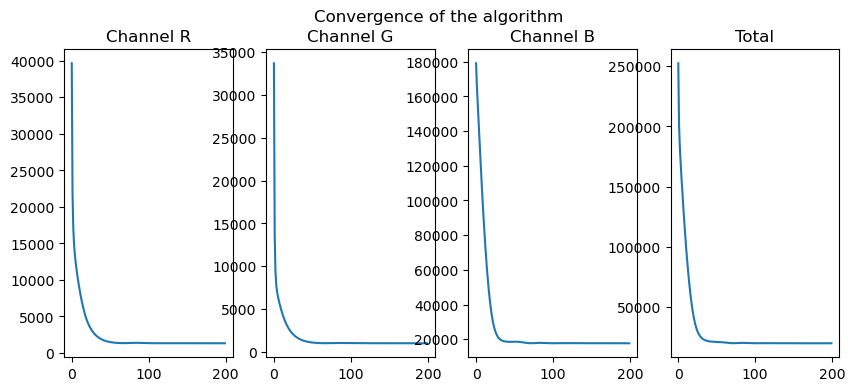

BokehModel(combine_events=True, render_bundle={'docs_json': {'dda9eccd-13d3-42ba-b74c-d5a56070a0ab': {'version…

In [41]:
step = 1
alpha = 3
res0,f0=FISTAPoissonEditing(source0,source0,mask3,step,alpha, 2000, v=grad_reflet(source0))
res1,f1=FISTAPoissonEditing(source1,source1,mask3,step,alpha, 2000, v=grad_reflet(source1))
res2,f2=FISTAPoissonEditing(source2,source2,mask3,step,alpha, 2000, v=grad_reflet(source2))


res = np.stack((res0,res1,res2),axis=2)
# print(res - f[0])
# print(f)

fig, ax = plt.subplots(1, 4, figsize=(10, 4))
ax[0].plot(f0)
ax[0].set_title('Channel R')
ax[1].plot(f1)
ax[1].set_title('Channel G')
ax[2].plot(f2)
ax[2].set_title('Channel B')
ax[3].plot(f0+f1+f2)
ax[3].set_title('Total')
plt.suptitle('Convergence of the algorithm')
plt.show()

pn.Row(hv.RGB(res.astype('uint8')).opts(**optionsRGB))

On remarque que le reflet a bien disparu , cependant notons que dans la zone d'edition nous perdons la texture de la pomme ce qui est compréhensible car on a moyénné le gradient et donc la texture aussi.

# harmonisation d'une image dupliqué

L'objectif ici est de dupliqué une image a motif et d'harmoniser les bord pour donner l'impression d'une image plus grand avec le meme motif . Nous allons ici deupliquer une tappisserie avec les bord harmonisé pour donner limpression davoir une unique tappisserie plus grande.

## importation de l'image et duplication

In [ ]:
source=np.array(Image.open("./img/laine.webp")).astype(float)

imagedup=np.tile(source,(2,3,1))
optionsRGB=dict(width=300,height=300,xaxis=None,yaxis=None,toolbar=None)
optionsGray=dict(cmap='gray',width=300,height=300,xaxis=None,yaxis=None,toolbar=None)
pn.Row(hv.RGB(source.astype('uint8')).opts(**optionsRGB), hv.RGB(imagedup.astype('uint8')).opts(**optionsRGB))

BokehModel(combine_events=True, render_bundle={'docs_json': {'987cd9b0-9a06-4515-a736-ce8ec42c7fdb': {'version…

## modification des contour et Conditions de Dirichet

Pour pouvoir harmoniser les images nous allons choisir les bords de la tappisserie comme conditions de dirichet . Cependant pour que les conditions de dirichet soit uniforme il harmoniser
- a gauche/droite
- en bas/en haut
- sur les coins.

On choisit donc davoir comme condition de dirichet : 
$$
f^*_{bas}=f^*_{haut}=\frac{1}{2}(g_{bas}+g_{haut}) \quad \text{et} \quad f^*_{gauche}=f^*_{droite}=\frac{1}{2}(g_{gauche}+g_{droite})
$$
Concernant les coins , les conditions de dirichet latérale et longitudinale vont coincider , on devra donc faire la moyenne des deux pour que le coin soit homogène

In [ ]:

# Largeur de la bande de bordure
border_width = 20

# Extract the values of the borders
top_border = source[:border_width, :, :]
bottom_border = source[-border_width:, :, :]
left_border = source[:, :border_width, :]
right_border = source[:, -border_width:, :]

# Calculate the average of the top and bottom borders
avg_top_bottom = 0.5 * (top_border + bottom_border)

# Calculate the average of the left and right borders
avg_left_right = 0.5 * (left_border + right_border)

# Calculate the average of the corners using the top-bottom and left-right averages
avg_top_left = 0.5 * (avg_top_bottom[:, :border_width, :] + avg_left_right[:border_width, :, :])
avg_top_right = 0.5 * (avg_top_bottom[:, -border_width:, :] + avg_left_right[-border_width:, :, :])
avg_bottom_left = 0.5 * (avg_top_bottom[:, :border_width, :] + avg_left_right[:border_width, :, :])
avg_bottom_right = 0.5 * (avg_top_bottom[:, -border_width:, :] + avg_left_right[-border_width:, :, :])

# Apply the averages to the corners
source[:border_width, :border_width, :] = avg_top_left
source[:border_width, -border_width:, :] = avg_top_right
source[-border_width:, :border_width, :] = avg_bottom_left
source[-border_width:, -border_width:, :] = avg_bottom_right


# Apply the averages to the non-corner areas
source[border_width:-border_width, :border_width, :] = avg_left_right[border_width:-border_width,:, :]
source[border_width:-border_width, -border_width:, :] = avg_left_right[border_width:-border_width,:, :]
source[:border_width, border_width:-border_width, :] = avg_top_bottom[:, border_width:-border_width, :]
source[-border_width:, border_width:-border_width, :] = avg_top_bottom[:, border_width:-border_width, :]


# Créer un masque pour l'intérieur de l'image (sans les bords)
mask4 = np.ones_like(source[:,:,1])
mask4[:border_width, :] = 0  # Bord supérieur
mask4[-border_width:, :] = 0  # Bord inférieur
mask4[:, :border_width] = 0  # Bord gauche
mask4[:, -border_width:] = 0  # Bord droit

pn.Row(hv.RGB(source.astype('uint8')).opts(**optionsRGB),hv.Image(mask4.astype('uint8')).opts(**optionsGray))

BokehModel(combine_events=True, render_bundle={'docs_json': {'31dca585-13b2-4085-a901-34ba58d693b6': {'version…

## duplication de l'image modifié et du masque

In [ ]:
sourcedup=np.tile(source,(2,3,1))
maskdup=np.tile(mask4,(2,3))
optionsRGBdup=dict(width=900,height=600,xaxis=None,yaxis=None,toolbar=None)
optionsGraydup=dict(cmap='gray',width=900,height=600,xaxis=None,yaxis=None,toolbar=None)

pn.Row(hv.RGB(sourcedup.astype('uint8')).opts(**optionsRGBdup),hv.Image(maskdup.astype('uint8')).opts(**optionsGraydup))

BokehModel(combine_events=True, render_bundle={'docs_json': {'099aed7e-ee49-44c9-9be6-5d3a808b26ae': {'version…

In [ ]:
sourcedup1=sourcedup[:,:,0]
sourcedup2=sourcedup[:,:,1]
sourcedup3=sourcedup[:,:,2]

imagedup1=imagedup[:,:,0]
imagedup2=imagedup[:,:,1]
imagedup3=imagedup[:,:,2]

## resolution avec FISTA

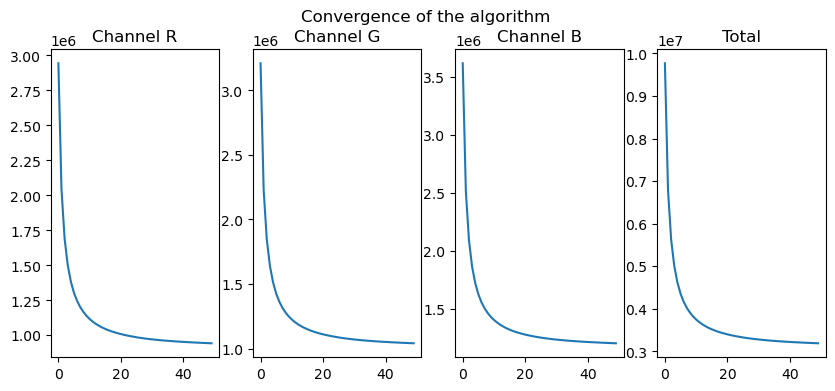

BokehModel(combine_events=True, render_bundle={'docs_json': {'8a1af5cd-eeea-41b2-83ea-68398f726f26': {'version…

In [ ]:
step = 1
alpha = 1
res0,f0=FISTAPoissonEditing(sourcedup1,imagedup1,maskdup,step,alpha, 500)
res1,f1=FISTAPoissonEditing(sourcedup2,imagedup2,maskdup,step,alpha, 500)
res2,f2=FISTAPoissonEditing(sourcedup3,imagedup3,maskdup,step,alpha, 500)

res = np.stack((res0,res1,res2),axis=2)
# print(res - f[0])
# print(f)

fig, ax = plt.subplots(1, 4, figsize=(10, 4))
ax[0].plot(f0)
ax[0].set_title('Channel R')
ax[1].plot(f1)
ax[1].set_title('Channel G')
ax[2].plot(f2)
ax[2].set_title('Channel B')
ax[3].plot(f0+f1+f2)
ax[3].set_title('Total')
plt.suptitle('Convergence of the algorithm')
plt.show()

pn.Row(hv.RGB(res.astype('uint8')).opts(**optionsRGBdup))

On remarque que les coins sont bien harmonisé mais que le coin pose toujours problème